In [164]:
import csv 
import pandas as pd

# convert to array
with open('../E-Jeep Data/Ejeep Sept 18.csv', 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    data = list(csv_reader)
    
# get track data and remove waypoints
for i,row in enumerate(data):
    if(len(row) > 0 and row[0] == 'Track'):
        data = data[i+1:]
        break

# remove header
header = data[0]
data = data[1:]

# convert to float and breakdown time data
for i in range(len(data)):
    data[i][3] = float(data[i][3])
    data[i][4] = float(data[i][4])
    
    # print(data[i]+data[i][1].replace('/', ' ').replace(':', ' ').replace('-', ' ').replace('.', ' ').split())
    
    # hack to get individual time data
    timelog = [int(x) for x in data[i][1].replace('/', ' ').replace(':', ' ').replace('-', ' ').replace('.', ' ').split()]
    data[i] += timelog

header += ['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second', 'Millisecond']   

# convert to dataframe
df = pd.DataFrame(data, columns=header)
df

,Date(GMT),Date(Local),Time(sec),Latitude,Longitude,Horizontal Accuracy(m),Altitude(m),Vertical Accuracy(m),Distance(m),Speed(m/s),...,Heading Accuracy(deg),Glide Ratio,Heart Rate (bpm),Year,Month,Day,Hour,Minute,Second,Millisecond
0,2023-09-18 04:52:44.00,2023-09-18 12:52:44.00,0.0003160238265991211,14.634736,121.076293,3.535533905932737,60.64281845092773,3,0,0,...,11.94986534118652,1018.12073776826,0,2023,9,18,12,52,44,0
1,2023-09-18 04:52:45.00,2023-09-18 12:52:45.00,0.5302410125732422,14.634736,121.076293,4.612905477116144,60.64281840994954,3.541982508706206,0,0,...,11.94986534118652,296.1881525974027,0,2023,9,18,12,52,45,0
2,2023-09-18 04:52:46.00,2023-09-18 12:52:46.00,1.522344946861267,14.634737,121.076293,4.612905477623176,61.00182719901204,3.541982508045873,0.04856229260522659,0,...,11.94986534118652,-171.6421289682452,0,2023,9,18,12,52,46,0
3,2023-09-18 04:52:47.00,2023-09-18 12:52:47.00,2.522934913635254,14.634726,121.076292,4.612905509348495,60.74187846761197,3.541982466728363,1.215731137435719,0,...,11.94986534118652,12.49411691942023,0,2023,9,18,12,52,47,0
4,2023-09-18 04:52:48.00,2023-09-18 12:52:48.00,3.522957921028137,14.634731,121.076293,4.612905492281161,61.36095805745572,3.541982488956028,1.796300261823075,0,...,11.91374492645264,3.42105642573424,0,2023,9,18,12,52,48,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3922,2023-09-18 05:58:02.00,2023-09-18 13:58:02.00,3917.535175919533,14.637880,121.074936,4.73619083637236,57.87492060568184,3.375356780290243,7520.7861368778,0.1596273314907966,...,13.85204792022705,200.0795705317799,0,2023,9,18,13,58,2,0
3923,2023-09-18 05:58:03.00,2023-09-18 13:58:03.00,3918.534995913506,14.637880,121.074938,4.734945825531293,58.17456339392811,3.377103057662383,7521.017005976285,0.05906419740085866,...,13.85204792022705,-95.70590328108769,0,2023,9,18,13,58,3,0
3924,2023-09-18 05:58:04.00,2023-09-18 13:58:04.00,3919.535025000572,14.637883,121.074939,4.735744249539151,58.36344206798822,3.375983328712644,7521.375289896265,0.1430991094213362,...,13.85204792022705,-47.32762001188367,0,2023,9,18,13,58,4,0
3925,2023-09-18 05:58:05.00,2023-09-18 13:58:05.00,3920.54584300518,14.637889,121.074935,4.734464033270184,58.48317391145974,3.377778463792417,7522.141683490589,0.1146652024744894,...,13.85204792022705,-168.5333941617361,0,2023,9,18,13,58,5,0


In [165]:
# normalize df
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
df[['Latitude','Longitude']] = scaler.fit_transform(df[['Latitude','Longitude']])
# test_data_scaled = scaler.transform(test_data[['lag_1', 'lag_2', 'lag_3', 'day_of_week', 'month']])
df


,Date(GMT),Date(Local),Time(sec),Latitude,Longitude,Horizontal Accuracy(m),Altitude(m),Vertical Accuracy(m),Distance(m),Speed(m/s),...,Heading Accuracy(deg),Glide Ratio,Heart Rate (bpm),Year,Month,Day,Hour,Minute,Second,Millisecond
0,2023-09-18 04:52:44.00,2023-09-18 12:52:44.00,0.0003160238265991211,0.007495,0.252595,3.535533905932737,60.64281845092773,3,0,0,...,11.94986534118652,1018.12073776826,0,2023,9,18,12,52,44,0
1,2023-09-18 04:52:45.00,2023-09-18 12:52:45.00,0.5302410125732422,0.007495,0.252595,4.612905477116144,60.64281840994954,3.541982508706206,0,0,...,11.94986534118652,296.1881525974027,0,2023,9,18,12,52,45,0
2,2023-09-18 04:52:46.00,2023-09-18 12:52:46.00,1.522344946861267,0.007651,0.252595,4.612905477623176,61.00182719901204,3.541982508045873,0.04856229260522659,0,...,11.94986534118652,-171.6421289682452,0,2023,9,18,12,52,46,0
3,2023-09-18 04:52:47.00,2023-09-18 12:52:47.00,2.522934913635254,0.005934,0.252430,4.612905509348495,60.74187846761197,3.541982466728363,1.215731137435719,0,...,11.94986534118652,12.49411691942023,0,2023,9,18,12,52,47,0
4,2023-09-18 04:52:48.00,2023-09-18 12:52:48.00,3.522957921028137,0.006715,0.252595,4.612905492281161,61.36095805745572,3.541982488956028,1.796300261823075,0,...,11.91374492645264,3.42105642573424,0,2023,9,18,12,52,48,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3922,2023-09-18 05:58:02.00,2023-09-18 13:58:02.00,3917.535175919533,0.498438,0.029000,4.73619083637236,57.87492060568184,3.375356780290243,7520.7861368778,0.1596273314907966,...,13.85204792022705,200.0795705317799,0,2023,9,18,13,58,2,0
3923,2023-09-18 05:58:03.00,2023-09-18 13:58:03.00,3918.534995913506,0.498438,0.029329,4.734945825531293,58.17456339392811,3.377103057662383,7521.017005976285,0.05906419740085866,...,13.85204792022705,-95.70590328108769,0,2023,9,18,13,58,3,0
3924,2023-09-18 05:58:04.00,2023-09-18 13:58:04.00,3919.535025000572,0.498907,0.029494,4.735744249539151,58.36344206798822,3.375983328712644,7521.375289896265,0.1430991094213362,...,13.85204792022705,-47.32762001188367,0,2023,9,18,13,58,4,0
3925,2023-09-18 05:58:05.00,2023-09-18 13:58:05.00,3920.54584300518,0.499844,0.028835,4.734464033270184,58.48317391145974,3.377778463792417,7522.141683490589,0.1146652024744894,...,13.85204792022705,-168.5333941617361,0,2023,9,18,13,58,5,0


In [166]:
X = df[:-1][['Latitude', 'Longitude']]#, 'Minute', 'Second']]#, 'Altitude(m)','Speed(m/s)', 'True Heading(deg)']]
X

,Latitude,Longitude
0,0.007495,0.252595
1,0.007495,0.252595
2,0.007651,0.252595
3,0.005934,0.252430
4,0.006715,0.252595
...,...,...
3921,0.497814,0.029000
3922,0.498438,0.029000
3923,0.498438,0.029329
3924,0.498907,0.029494


In [167]:
# Create 10 lag features
for i in range(1,11):
    X[f'Latitude_Lag_{i}'] = df['Latitude'].shift(i)
    X[f'Longitude_Lag_{i}'] = df['Longitude'].shift(i)
X = X.dropna()

# Y is the next steps
Y = X.iloc[1:][['Latitude', 'Longitude']]
# nextX is the last 2 rows but dataframe
nextX = X.iloc[[-1]]
X = X.iloc[:-1]

#shape of X and Y
X, Y

(      Latitude  Longitude  Latitude_Lag_1  Longitude_Lag_1  Latitude_Lag_2  \
 10    0.004685   0.253749        0.004685         0.253749        0.004997   
 11    0.004841   0.253419        0.004685         0.253749        0.004685   
 12    0.004060   0.252595        0.004841         0.253419        0.004685   
 13    0.004216   0.252430        0.004060         0.252595        0.004841   
 14    0.004216   0.252101        0.004216         0.252430        0.004060   
 ...        ...        ...             ...              ...             ...   
 3920  0.498282   0.028176        0.497970         0.027682        0.496408   
 3921  0.497814   0.029000        0.498282         0.028176        0.497970   
 3922  0.498438   0.029000        0.497814         0.029000        0.498282   
 3923  0.498438   0.029329        0.498438         0.029000        0.497814   
 3924  0.498907   0.029494        0.498438         0.029329        0.498438   
 
       Longitude_Lag_2  Latitude_Lag_3  Longitude_

In [168]:
import xgboost as xgb

params = {
    'objective': 'reg:squarederror',  # Specify the regression objective
    'n_estimators': 100,             # Number of boosting rounds (trees)
    'learning_rate': 0.1,           # Step size shrinkage to prevent overfitting
    'max_depth': 5,                 # Maximum depth of each tree
    'min_child_weight': 1,          # Minimum sum of instance weight (hessian) needed in a child
    'gamma': 0,                     # Minimum loss reduction required to make a further partition on a leaf node
    'subsample': 0.8,               # Fraction of samples used for training each tree
    'colsample_bytree': 0.8,        # Fraction of features used for training each tree
    'random_state': 42               # Seed for reproducibility
}

reg = xgb.XGBRegressor(**params)
reg.fit(X, Y, verbose=True)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [169]:
# !pip install graphviz
import matplotlib.pyplot as plt
import matplotlib

plt.figure(figsize=(16, 10), dpi=1000)
xgb.plot_tree(reg, num_trees=0, rankdir='LR')  # num_trees specifies the tree index (0 for the first tree)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(150, 100)
fig.show()


/var/folders/5l/rqbcwgpj3rn89b6_cfpmypf80000gn/T/ipykernel_23710/1252786345.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 16000x10000 with 0 Axes>

In [170]:
# copy X to predictions
predictions = X.copy()

for i in range(1000):
    nextX = predictions.iloc[[-1]]
    y_pred = reg.predict(nextX)
    
    # if(nextX['Latitude'].values[0] == y_pred[0][0] and nextX['Longitude'].values[0] == y_pred[0][1]):
    #     print('same')
    #     break

    # shift nextX to the right
    # !don't run multiple times because nextX shifts to the right everytime
    nextX = nextX.shift(2, axis=1)

    # set nextX latitude and longitude to y_pred
    nextX[['Latitude', 'Longitude']] = y_pred

    # add another row to predictions
    predictions = predictions.append(nextX, ignore_index=True)

predictions

/var/folders/5l/rqbcwgpj3rn89b6_cfpmypf80000gn/T/ipykernel_23710/1685956685.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = predictions.append(nextX, ignore_index=True)
/var/folders/5l/rqbcwgpj3rn89b6_cfpmypf80000gn/T/ipykernel_23710/1685956685.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = predictions.append(nextX, ignore_index=True)
/var/folders/5l/rqbcwgpj3rn89b6_cfpmypf80000gn/T/ipykernel_23710/1685956685.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = predictions.append(nextX, ignore_index=True)
/var/folders/5l/rqbcwgpj3rn89b6_cfpmypf80000gn/T/ipykernel_23710/1685956685.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

,Latitude,Longitude,Latitude_Lag_1,Longitude_Lag_1,Latitude_Lag_2,Longitude_Lag_2,Latitude_Lag_3,Longitude_Lag_3,Latitude_Lag_4,Longitude_Lag_4,...,Latitude_Lag_6,Longitude_Lag_6,Latitude_Lag_7,Longitude_Lag_7,Latitude_Lag_8,Longitude_Lag_8,Latitude_Lag_9,Longitude_Lag_9,Latitude_Lag_10,Longitude_Lag_10
0,0.004685,0.253749,0.004685,0.253749,0.004997,0.253419,0.004997,0.253419,0.005465,0.253089,...,0.006715,0.252595,0.005934,0.252430,0.007651,0.252595,0.007495,0.252595,0.007495,0.252595
1,0.004841,0.253419,0.004685,0.253749,0.004685,0.253749,0.004997,0.253419,0.004997,0.253419,...,0.006871,0.252925,0.006715,0.252595,0.005934,0.252430,0.007651,0.252595,0.007495,0.252595
2,0.004060,0.252595,0.004841,0.253419,0.004685,0.253749,0.004685,0.253749,0.004997,0.253419,...,0.005465,0.253089,0.006871,0.252925,0.006715,0.252595,0.005934,0.252430,0.007651,0.252595
3,0.004216,0.252430,0.004060,0.252595,0.004841,0.253419,0.004685,0.253749,0.004685,0.253749,...,0.004997,0.253419,0.005465,0.253089,0.006871,0.252925,0.006715,0.252595,0.005934,0.252430
4,0.004216,0.252101,0.004216,0.252430,0.004060,0.252595,0.004841,0.253419,0.004685,0.253749,...,0.004997,0.253419,0.004997,0.253419,0.005465,0.253089,0.006871,0.252925,0.006715,0.252595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4910,0.498475,0.027219,0.498475,0.027219,0.498475,0.027219,0.498475,0.027219,0.498475,0.027219,...,0.498475,0.027219,0.498475,0.027219,0.498475,0.027219,0.498475,0.027219,0.498475,0.027219
4911,0.498475,0.027219,0.498475,0.027219,0.498475,0.027219,0.498475,0.027219,0.498475,0.027219,...,0.498475,0.027219,0.498475,0.027219,0.498475,0.027219,0.498475,0.027219,0.498475,0.027219
4912,0.498475,0.027219,0.498475,0.027219,0.498475,0.027219,0.498475,0.027219,0.498475,0.027219,...,0.498475,0.027219,0.498475,0.027219,0.498475,0.027219,0.498475,0.027219,0.498475,0.027219
4913,0.498475,0.027219,0.498475,0.027219,0.498475,0.027219,0.498475,0.027219,0.498475,0.027219,...,0.498475,0.027219,0.498475,0.027219,0.498475,0.027219,0.498475,0.027219,0.498475,0.027219


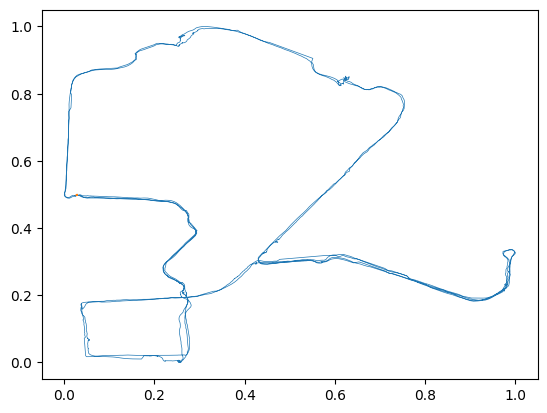

In [171]:
# Plot 2d array of latitude and longitude on a map
import matplotlib.pyplot as plt

# plot
plt.plot(X['Longitude'], X['Latitude'], linewidth=0.5)
plt.plot(predictions[len(X):]['Longitude'], predictions[len(X):]['Latitude'], linewidth=1.5)
plt.show()

In [172]:
import xgboost as xgb

# Create regression matrices
dtrain_reg = xgb.DMatrix(X, Y, enable_categorical=True)
# dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [173]:
# Define hyperparameters
params = {"objective": "reg:squarederror"} # , "tree_method": "gpu_hist"}

n = 1000

# evals = [(dtrain_reg, "train"), (dtest_reg, "validation")]

model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
   # evals=evals,
   verbose_eval=10,
   # early_stopping_rounds=20,
)

In [174]:
results = xgb.cv(
   params, 
   dtrain_reg,
   num_boost_round=n,
   nfold=5,
   verbose_eval=10
)
results

[0]	train-rmse:0.20503+0.00058	test-rmse:0.20501+0.00233
[10]	train-rmse:0.00651+0.00002	test-rmse:0.00689+0.00015
[20]	train-rmse:0.00154+0.00002	test-rmse:0.00271+0.00009
[30]	train-rmse:0.00130+0.00001	test-rmse:0.00259+0.00008
[40]	train-rmse:0.00117+0.00002	test-rmse:0.00256+0.00008
[50]	train-rmse:0.00108+0.00003	test-rmse:0.00254+0.00007
[60]	train-rmse:0.00107+0.00004	test-rmse:0.00254+0.00007
[70]	train-rmse:0.00107+0.00004	test-rmse:0.00254+0.00007
[80]	train-rmse:0.00107+0.00004	test-rmse:0.00254+0.00007
[90]	train-rmse:0.00107+0.00004	test-rmse:0.00254+0.00007
[100]	train-rmse:0.00107+0.00004	test-rmse:0.00254+0.00007
[110]	train-rmse:0.00107+0.00004	test-rmse:0.00254+0.00007
[120]	train-rmse:0.00107+0.00004	test-rmse:0.00254+0.00007
[130]	train-rmse:0.00107+0.00004	test-rmse:0.00254+0.00007
[140]	train-rmse:0.00107+0.00004	test-rmse:0.00254+0.00007
[150]	train-rmse:0.00107+0.00004	test-rmse:0.00254+0.00007
[160]	train-rmse:0.00107+0.00004	test-rmse:0.00254+0.00007
[170]	tr

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.205032,0.000577,0.205010,0.002333
1,0.144003,0.000404,0.143953,0.001623
2,0.101153,0.000283,0.101109,0.001160
3,0.071085,0.000200,0.071102,0.000874
4,0.049990,0.000141,0.050043,0.000668
...,...,...,...,...
995,0.001071,0.000043,0.002537,0.000073
996,0.001071,0.000043,0.002537,0.000073
997,0.001071,0.000043,0.002537,0.000073
998,0.001071,0.000043,0.002537,0.000073


In [175]:
print(dtrain_reg)

In [176]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# get last row of Y
current = Y.iloc[-1]
current
preds = model.predict(current)
preds
# print(X_test.head())
# print(preds[:5])

TypeError: ('Expecting data to be a DMatrix object, got: ', <class 'pandas.core.series.Series'>)